In [67]:
import pandas as pd
import seaborn as sns
import random
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import loguniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
pd.options.display.max_columns = 205
import warnings
warnings.filterwarnings("ignore")
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import time
import matplotlib as mpl
%matplotlib inline


Commençons par importer le Dataframe résultant du travail de cleaning du notebook précédent 

In [3]:
FinalStatcon = sqlite3.connect('finalstat.sqlite')


In [4]:
FinalStat = pd.read_sql("""SELECT * from FinalStat""", FinalStatcon)


In [5]:
DF = FinalStat.copy()

In [7]:
DF.head(10)

,level_0,Player,Pos,Age,Tm,G,GS,MP_PER_GAME,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MP_TOT,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pts Won,Pts Max,Share,Team,index,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,1542.0,11.8,0.564,0.015,0.430,12.4,15.5,14.0,4.2,1.5,1.7,17.7,14.7,1.4,2.0,3.3,0.103,-1.6,0.1,-1.6,0.2,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
1,1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,0.3,0.8,0.361,6.4,12.2,0.523,0.524,1.8,2.3,0.784,0.7,1.8,2.5,2.2,1.1,0.2,1.4,2.2,15.4,1986,2190.0,15.0,0.550,0.062,0.178,3.0,6.6,4.9,10.2,1.8,0.4,9.4,21.7,3.2,2.0,5.2,0.113,0.0,-0.3,-0.3,0.9,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
2,2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,0.0,0.2,0.000,8.4,14.3,0.586,0.579,3.2,4.2,0.771,1.8,3.3,5.2,2.7,1.1,1.0,2.0,2.6,20.0,1986,2454.0,20.4,0.613,0.012,0.289,6.6,11.1,9.0,11.5,1.6,1.7,10.9,22.6,6.7,2.7,9.5,0.185,3.5,0.3,3.9,3.6,7.0,780.0,0.009,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
3,3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,0.0,0.0,0.000,2.0,3.0,0.667,0.667,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1986,3.0,37.7,0.667,0.000,0.000,0.0,36.1,18.9,0.0,0.0,0.0,0.0,40.3,0.0,0.0,0.0,0.349,3.4,0.2,3.6,0.0,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
4,4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986,2629.0,22.7,0.603,0.001,0.328,6.0,14.2,10.3,15.7,1.2,2.7,11.7,26.6,7.6,3.2,10.8,0.197,4.4,1.0,5.4,4.9,135.0,780.0,0.173,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
5,5,Kurt Rambis,PF,27.0,LAL,74.0,74.0,21.3,2.2,3.6,0.595,0.0,0.0,0.000,2.2,3.6,0.595,0.595,1.2,1.6,0.721,2.1,4.9,7.0,0.9,0.9,0.4,1.3,2.7,5.5,1986,1573.0,12.7,0.632,0.000,0.454,11.8,24.9,18.7,5.1,2.0,1.2,23.1,10.8,1.7,2.6,4.3,0.131,-0.5,1.1,0.6,1.1,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
6,6,Larry Spriggs,SF,26.0,LAL,43.0,7.0,11.0,2.0,4.5,0.458,0.0,0.0,0.000,2.0,4.4,0.461,0.458,0.9,1.1,0.776,0.7,1.2,1.9,1.1,0.4,0.2,1.3,1.8,5.0,1986,471.0,10.5,0.501,0.005,0.255,7.1,12.2,9.8,13.3,1.8,1.1,20.2,22.9,-0.3,0.6,0.3,0.027,-3.6,-0.4,-3.9,-0.2,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
7,7,Magic Johnson,PG,26.0,LAL,72.0,70.0,35.8,6.7,12.8,0.526,0.1,0.6,0.233,6.6,12.2,0.541,0.532,5.3,6.0,0.871,1.2,4.7,5.9,12.6,1.6,0.2,3.8,1.8,18.8,1986,2578.0,24.0,0.610,0.047,0.473,3.9,14.3,9.4,45.1,2.0,0.3,19.8,21.6,9.0,3.1,12.1,0.226,6.0,0.7,6.7,5.7,205.0,780.0,0.263,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
8,8,Maurice Lucas,PF,33.0,LAL,77.0,8.0,22.7,3.9,8.5,0.462,0.0,0.0,0.500,3.9,8.5,0.462,0.463,2.3,3.0,0.783,2.1,5.2,7.4,1.1,0.6,0.3,1.6,3.3,10.2,1986,1750.0,13.8,0.520,0.003,0.352,11.2,24.9,18.4,6.0,1.2,0.8,13.8,20.2,1.5,2.5,4.0,0.110,-1.6,-0.7,-2.3,-0.1,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
9,9,Michael Cooper,SG,29.0,LAL,82.0,15.0,27.7,3.3,7.4,0.452,0.8,2.0,0.387,2.6,5.4,0.476,0.504,1.8,2.1,0.865,0.5,2.4,3.0,5.7,1.1,0.5,1.8,2.9,9.2,1986,2269.0,13.5,0.557,0.269,0.281,2.3,9.6,6.1,24.3,1.8,1.0,18.2,14.8,3.4,2.4,5.8,0.123,0.7,1.1,1.8,2.2,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84


Intéressons nous aux différentes variables dont nous disposons 

In [8]:
print(DF.columns)

Index(['level_0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP_PER_GAME', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Year', 'MP_TOT', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Pts Won', 'Pts Max', 'Share',
       'Team', 'index', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')


On peut commencer par retirer les variables artificielles qui se sont rajoutées après une jointure ou export vers une base sql 

In [9]:
DF.drop(columns = ["index","level_0"], inplace = True)

In [10]:
print(DF.columns)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP_PER_GAME', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'MP_TOT', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'Pts Won', 'Pts Max', 'Share', 'Team',
       'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')


On cherche pour le moment à prédire le prochain MVP. 

Ainsi, il faut choisir une(des) variable(s) cibles qui nous donneront les informations sur le MVP une fois prédites.

Dans la liste des variables disponibles, la variable "Share" semble la plus pertinente à définir comme variable cible.
En effet, cette dernière donne pour chaque joueur la part des points de votes obtenues pour le MVP.

Comme cette variable Share s'obtient par le calcul Pts Won / Pts Max, on ne peut pas se permettre de garder ces variables pour notre modèle car elles nous donnent directement la réponse

In [11]:
DF.drop(columns = ["Pts Won","Pts Max"], inplace = True)

Pour pouvoir entrainer le modèle, il est nécessaire de travailler uniquement sur des variables numériques. Intéressons nous donc aux variables non numériques

In [12]:
DF.select_dtypes(exclude=np.number).columns

Index(['Player', 'Pos', 'Tm', 'Team'], dtype='object')

On voit ici que 4 variables sont concernées :
- "Player" les noms des joueurs
- "Pos" leur position sur le terrain
- "Team" les nom complets de leurs équipes
- "Tm" l'abréviation de leur équipe

On peut déjà supprimer "Tm" qui donnent exactement les mêmes informations que la variable "Team" elle est donc inutile.
Pour les 3 restantes, on va procédérer à un encodage automatique ( on peut se le permettre car il n'y a pas de relation d'ordre pour ces variables)

In [13]:
DF.drop(columns = ["Tm"], inplace = True) 
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3 = LabelEncoder()
DF['Player'] = labelencoder1.fit_transform(DF['Player'])
DF['Pos'] = labelencoder2.fit_transform(DF['Pos'])
DF['Team'] = labelencoder3.fit_transform(DF['Team'])

Vérifions que la transformation a fonctionné 

In [22]:
DF.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

## Analyse descriptive

In [23]:
DF.describe()

,Player,Pos,Age,G,GS,MP_PER_GAME,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MP_TOT,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
count,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.00000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000,18367.000000
mean,1669.477051,1.992922,26.633691,52.570153,25.588392,20.356623,3.176877,6.980334,0.440609,0.496341,1.434469,0.225325,2.680106,5.545418,0.466391,0.473880,1.565656,2.089209,0.70209,1.018054,2.568639,3.585360,1.906190,0.667741,0.419089,1.240224,1.911483,8.413905,2004.533511,1237.070180,12.753994,0.512256,0.201451,0.307022,5.963140,14.091528,10.028682,13.131905,1.628611,1.543932,14.342467,18.845560,1.350683,1.267093,2.618468,0.072000,-1.506131,-0.189944,-1.696477,0.627408,0.005802,17.137801,39.826918,40.340883,0.496667,15.543311,102.743148,102.854968,-0.106876
std,972.432443,1.427531,4.116983,25.554348,29.218436,10.115838,2.278229,4.714638,0.098671,0.671086,1.773107,0.180563,2.089603,4.102503,0.108304,0.101801,1.433921,1.807051,0.19302,0.857783,1.816225,2.543784,1.876064,0.471913,0.501346,0.823940,0.853311,6.125745,11.849801,913.530066,6.245222,0.098196,0.211638,0.215792,4.858428,6.555726,4.970633,9.456346,1.024354,1.809722,6.506992,5.513984,2.080694,1.218412,2.999740,0.102328,4.017230,1.830579,5.022885,1.360922,0.058197,10.406588,12.703868,12.665042,0.153445,12.990331,7.503124,7.534520,4.516428
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.300000,-1.000000,-2.100000,-2.519000,-68.900000,-31.100000,-92.100000,-2.600000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000
25%,817.500000,1.000000,23.000000,32.000000,1.000000,12.000000,1.400000,3.300000,0.404000,0.000000,0.000000,0.000000,1.100000,2.400000,0.430500,0.441000,0.600000,0.800000,0.65100,0.400000,1.200000,1.700000,0.600000,0.300000,0.100000,0.600000,1.300000,3.650000,1995.000000,386.500000,9.900000,0.481000,0.009000,0.190000,2.400000,9.300000,6.200000,6.500000,1.100000,0.400000,10.800000,15.200000,0.000000,0.300000,0.300000,0.037000,-3.200000,-1.000000,-3.500000,-0.100000,0.000000,8.000000,30.000000,31.000000,0.378000,4.000000,97.000000,97.200000,-3.230000
50%,1669.000000,2.000000,26.000000,60.000000,10.000000,19.800000,2.600000,5.800000,0.445000,0.200000,0.600000,0.278000,2.100000,4.400000,0.474000,0.483000,1.100000,1.600000,0.74800,0.800000,2.200000,3.000000,1.300000,0.600000,0.300000,1.000000,1.900000,6.900000,2005.000000,1140.000000,12.800000,0.524000,0.132000,0.276000,4.900000,13.100000,9.200000,10.400000,1.500000,1.000000,13.600000,18.500000,0.600000,0.900000,1.700000,0.081000,-1.300000,-0.200000,-1.400000,0.100000,0.000000,16.000000,41.000000,40.000000,0.512000,14.000000,102.200000,102.700000,0.140000
75%,2514.000000,3.000000,29.000000,75.000000,51.000000,28.800000,4.500000,9.800000,0.488000,0.800000,2.400000,0.359000,3.800000,7.800000,0.514000,0.521000,2.100000,2.800000,0.81400,1.4

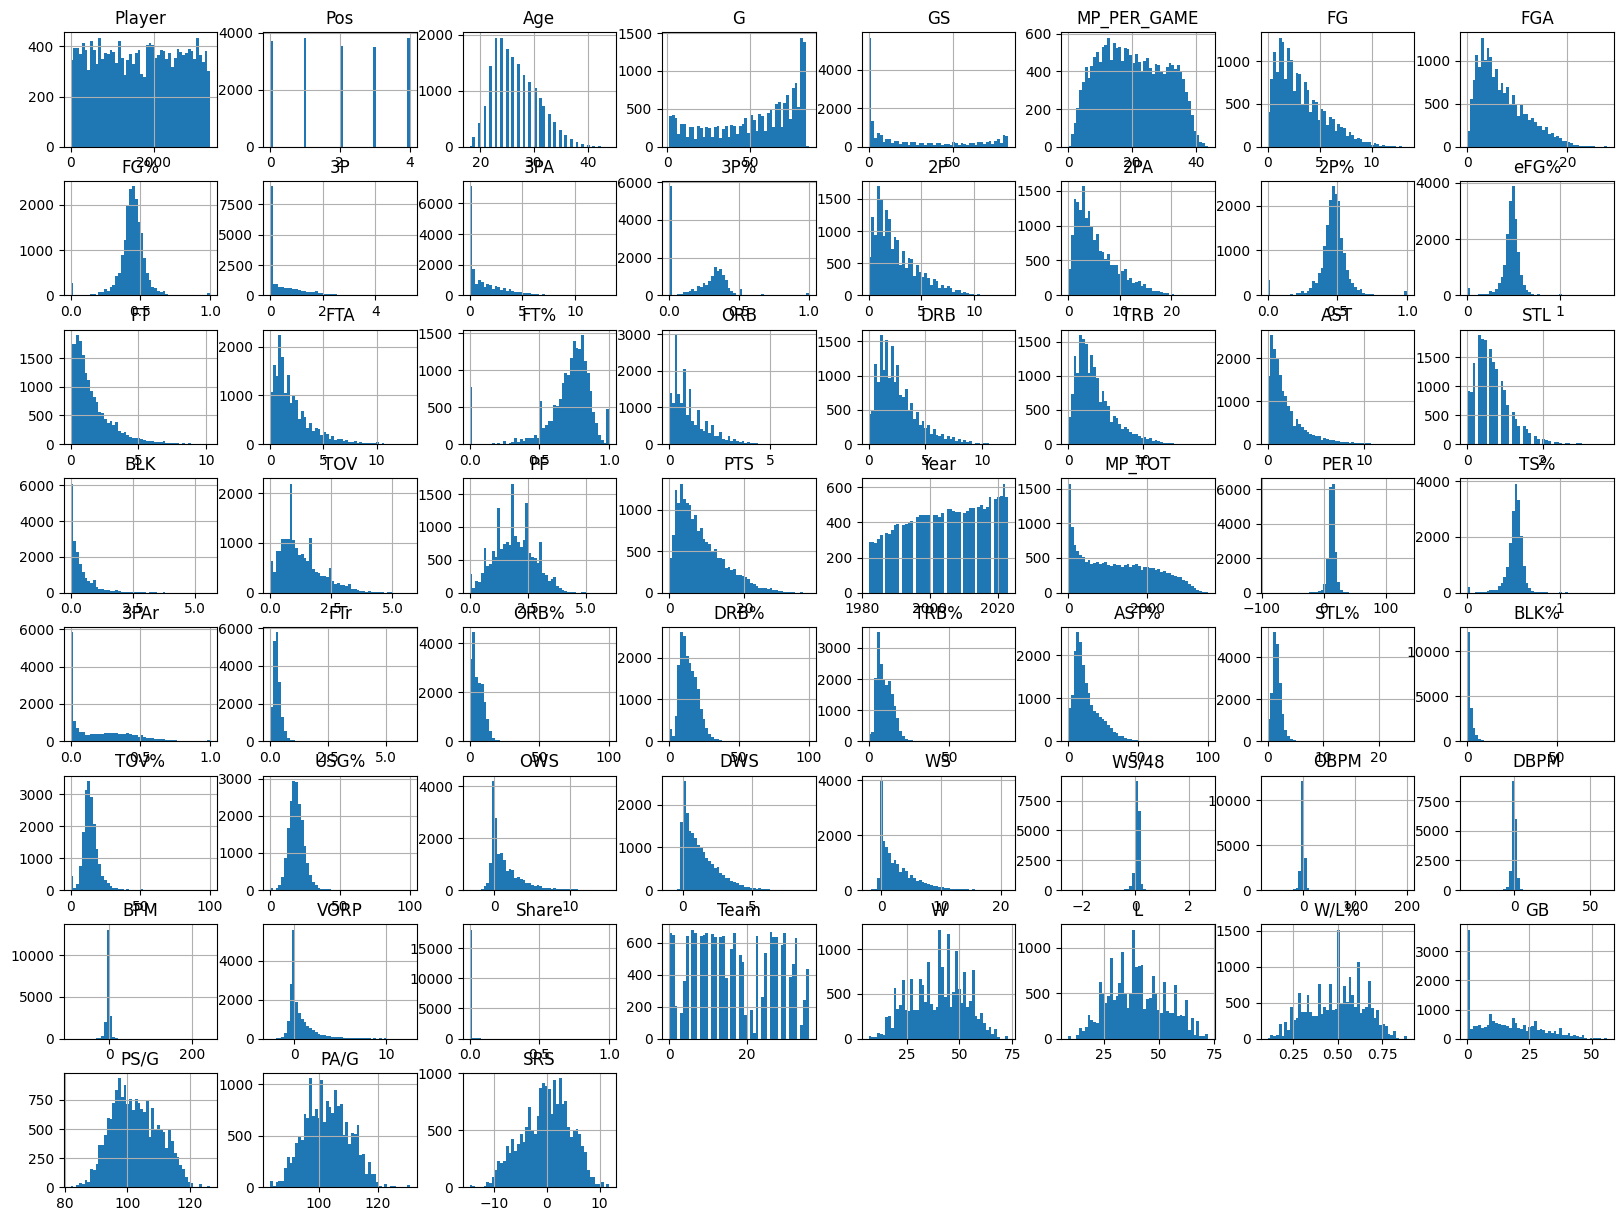

In [14]:
for column in DF.select_dtypes(include=['object']).columns:
    DF[column].value_counts().plot(kind='bar')
    plt.show()

#affiche les histogrammes pour les variables numériques
DF.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
cor = DF.corr()
cor

,Player,Pos,Age,G,GS,MP_PER_GAME,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MP_TOT,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Player,1.000000,0.021610,-0.013050,0.006221,-0.001234,-0.006569,0.002156,0.006384,-0.016226,0.013818,0.013454,0.023424,-0.001983,0.001652,-0.007376,-0.009187,-0.016457,-0.020908,0.021569,-0.022533,-0.028746,-0.028139,0.014565,-0.000217,-0.026914,-0.003522,-0.021140,-0.000822,-0.001875,-0.001245,-0.004434,-0.006658,0.019836,-0.028305,-0.015103,-0.038892,-0.032699,0.019524,0.006012,-0.034599,-0.018737,0.014668,-0.003290,-0.011813,-0.007052,-0.006053,0.004433,-0.022733,-0.004853,-0.004402,0.014641,-0.015149,0.010663,-0.005613,0.008916,-0.008692,0.019794,0.012996,0.012065
Pos,0.021610,1.000000,-0.066960,-0.002180,-0.010910,0.093383,0.093320,0.163574,-0.229634,0.362079,0.383090,0.387737,-0.014345,0.022754,-0.129762,-0.072343,0.044228,-0.009566,0.169514,-0.419822,-0.304694,-0.359102,0.197907,0.225417,-0.416022,0.050196,-0.226241,0.119370,0.024911,0.057000,-0.079670,-0.056750,0.421725,-0.221115,-0.487290,-0.554517,-0.603810,0.247251,0.194974,-0.456786,-0.142669,0.150707,0.009094,-0.123808,-0.043971,-0.102974,0.086090,-0.081891,0.039121,0.040973,-0.005501,-0.002504,-0.001920,0.003645,-0.002956,0.001185,0.022826,0.025643,-0.004505
Age,-0.013050,-0.066960,1.000000,0.053827,0.057538,0.094190,0.024338,0.026311,0.009221,0.056268,0.042378,0.025998,0.008473,0.011947,-0.006033,0.030167,0.015529,-0.003318,0.084041,-0.006370,0.073355,0.050192,0.075278,0.026183,-0.001970,0.009212,0.055073,0.027942,-0.064182,0.064054,0.010652,0.038242,0.028093,-0.041476,-0.061376,0.015392,-0.016850,0.047359,-0.044402,-0.050388,0.007330,-0.123426,0.086326,0.088077,0.095722,0.089608,0.059940,0.091830,0.081336,0.079473,0.018271,-0.005283,0.161517,-0.161924,0.167848,-0.129861,-0.063762,-0.163675,0.160553
G,0.006221,-0.002180,0.053827,1.000000,0.620036,0.645961,0.546691,0.526013,0.338858,0.225185,0.209950,0.194239,0.523441,0.513548,0.292775,0.338846,0.439098,0.438969,0.386308,0.386397,0.474536,0.469214,0.383444,0.473646,0.294125,0.478276,0.549676,0.534671,-0.159733,0.853475,0.390550,0.366274,-0.061587,-0.023773,-0.040178,0.044455,0.009963,0.158428,0.018841,0.010031,-0.120084,0.083615,0.517376,0.682125,0.635426,0.377046,0.414077,0.178014,0.395970,0.409053,0.091566,0.005524,0.123227,-0.043070,0.086054,-0.050496,0.029029,-0.026502,0.088302
GS,-0.001234,-0.010910,0.057538,0.620036,1.000000,0.828684,0.756982,0.739571,0.258573,0.294918,0.290983,0.136986,0.730544,0.724092,0.215893,0.243387,0.645605,0.648884,0.239003,0.490320,0.659275,0.636172,0.551100,0.615319,0.395114,0.688411,0.595955,0.746832,-0.079033,0.867981,0.427371,0.275396,-0.080269,0.016173,-0.031728,0.105244,0.054497,0.235905,0.026519,0.030141,-0.110405,0.242783,0.666938,0.727017,0.757587,0.323758,0.425937,0.125391,0.386319,0.626764,0.171158,0.002334,0.056385,-0.020573,0.039676,-0.023005,0.005705,-0.019375,0.040057
MP_PER_GAME,-0.006569,0.093383,0.094190,0.645961,0.828684,1.000000,0.892059,0.897351,0.291106,0.446888,0.453609,0.260544,0.829047,0.835247,0.268792,0.317186,0.763453,0.761413,0.383058,0.505185,0.732994,0.693688,0.665508,0.747802,0.387767,0.818252,0.709527,0.891550,-0.039113,0.899400,0.512310,0.361490,0.016357,-0.014525,-0.134172,0.048215,-0.034706,0.323947,0.047629,-0.037727,-0.162932,0.298363,0.675063,0.712294,0.757047,0.388400,0.537573,0.129649,0.477139,0.634393,0.166140,-0.002525,-0.023161,0.029210,-0.027197,0.031337,-0.023464,-0.006556,-0.027466
FG,0.002156,0.093320,0.024338,0.546691,0.756982,0.892059,1.000000,0.981734,0.332131,0.416054,0.420295,0.240276,0.956588,0.946677,0.298677,0.330753,0.854985,0.848016,0.349195,0.473894,0.683717,0.647945,0.614585,0.666436,0.360849,0.830992,0.601526,0.989779,-0.057604,0.812635,0.617545,0.374544,-0.050992,-0.011359,-0.090369,0.064545,-0.001372,0.322530,0.031990,-0.027203,-0.227094,0.565615,0.730780,0.649990,0

In [24]:
corr = DF.corr(method = "pearson")["Share"]

In [25]:
abs_corr = abs(corr)
abs_corr.sort_values().tail(25)

WS/48          0.161518
MP_PER_GAME    0.166140
GS             0.171158
MP_TOT         0.174300
STL            0.183531
BPM            0.187158
OBPM           0.189352
TRB            0.195221
USG%           0.198390
AST            0.202024
DRB            0.217374
PER            0.219496
TOV            0.232998
FGA            0.246736
2PA            0.249935
FG             0.272204
2P             0.272294
DWS            0.276788
PTS            0.285132
FT             0.316886
FTA            0.317559
WS             0.380077
OWS            0.386185
VORP           0.465078
Share          1.000000
Name: Share, dtype: float64

Toutes nos variables sont maintenant numériques. Il faut maintenant réfléchir à quel type de modèle serait le plus pertinent dans notre cas.

La variable "Share" étant une variable prenant des valeurs sur tout l'intervalle [0,1], il sera plus judicieux ici de se tourner vers une régression.

In [27]:
years =  sorted(DF["Year"].unique())
print(years)

[1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


L'idée est d'utiliser les résultats des autres années pour prédire une année en particulier

Pour évaluer les performances du modèle, nous allons implémenter une métrique qui va comparer les places des prétendants MVP avec leurs classements réels.

In [33]:
def error_rank_mvp(df,model):
    #DF : Dataframe contenant au minimum la variable "Share"  ainsi que 
    #le classement réel et le classement prédit "Rank_pred", "Rank_reel"
    #On trie le Dataframe sur le classement réel
    df.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
    #La variable i va contenir la position du dernier convoqué au MVP.
    #De cette manière en parcourant le Dataframe du début jusqu'à la position i, 
    #nous aurons tous les convoqués au MVP
    
    i= 0
    while df["Share"].iloc[i] > 0:
        i +=1
    #print("Nombre de convoqués MVP : {}".format(i))
    rmse = (np.abs(df["Rank_reel"][:i]-df["Rank_pred_{}".format(model)][:i]))**2
    rmse = rmse.sum()/i
    rmse = np.sqrt(rmse)
    diff_top1 = np.abs(df["Rank_reel"].iloc[0]-df["Rank_pred_{}".format(model)].iloc[0])
    return(rmse,diff_top1)

    
    

En plus de cette métrique, implémentons une fonction *pred_to_df* permettant de résumer toutes les étapes dans la création du dataframe final à partir d'une prédiction.


In [27]:
def pred_to_df(Y_preds,test,y_column,models):
        
        test["Player"] =  labelencoder1.inverse_transform(test['Player'])
        models_names = list(models.keys())
        
        #Mise sous dataframe des prédictions
        DF_pred = test["Player"]
        for i in range(len(models)):
                
                Y_pred = pd.DataFrame(Y_preds[i],columns = ["Pred_Share_{}".format(models_names[i])],index = test.index)
                
                #Création du dataframe des valeurs prédites avec leurs rangs
                DF_pred = pd.concat([DF_pred,Y_pred],axis = 1,join="inner")
                
                DF_pred.sort_values(by=['Pred_Share_{}'.format(models_names[i])],ascending = False, inplace = True)
                DF_pred["Rank_pred_{}".format(models_names[i])] = 0
                DF_pred["Rank_pred_{}".format(models_names[i])] = DF_pred["Pred_Share_{}".format(models_names[i])].rank(ascending=False, method='min').astype(int)
                
        ##Création du dataframe des valeurs réelles avec leurs rangs
        DF_reel = pd.DataFrame(test[y_column])
        DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)
        DF_reel["Rank_reel"] = 0
        DF_reel["Rank_reel"] = DF_reel["Share"].rank(ascending=False, method='min').astype(int)
        DF_reel.drop(columns = ["Share"], inplace = True)
        #Concaténation
        DF_pred = pd.concat([DF_pred,test[y_column]],axis = 1,join="inner")
        DF_year = pd.concat([DF_pred,DF_reel], axis  = 1 )
        DF_year.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
        return DF_year
    
    

Enfin, créons une fonction qui, à partir des données et d'une liste de modèles choisis, renvoie la valeur calculée par la métrique *error_rank_mvp* pour chaque modèle et chaque prédiction qu'il a effectué.

Cette permettra de se rendre compte de la qualité du modèle

In [31]:
def prediction(DF,models,n = 8,selected_features = DF.drop('Share', axis=1).columns,cv = True,year = None ):
    #DF : Dataframe comportant toutes les données exploitables pour l'apprentissage
    #model : Type du modèle que l'on va entrainer pour la prédiction du MVP
    #cv : Booléen qui vaut True si l'utilisateur veut faire de la validation croisée, 0 sinon
    #year : l'année test choisie en cas de non validation croisée
    #n_splits : nombre d'années testées
    #selected_features : variables choisies pour le modèle
    model_performance = pd.DataFrame(columns=['MeanErrorRank','Diff_Rank_MVP_actual/predict','time to train','time to predict','total time'])
    if cv == True:
        years =  sorted(DF["Year"].unique())[-n:-1]
        x_columns =  selected_features
        y_column  = 'Share'
        global_error = 0
        start = []
        end_train = []
        end_predict = []
        for year in years:
            #Construction ensemble apprentissage/test
            train =  DF[DF["Year"] < year]
            test =   DF[DF["Year"] == year]
            Y_preds_MVP = [] 
            #Entrainement du meilleur modèle
            for model in list(models.values()):
                
                start.append(time.time())
                model.fit(train[x_columns], train[y_column])
                end_train.append(time.time())
            #Prédiction
                Y_preds_MVP.append(model.predict(test[x_columns]))
                end_predict.append(time.time())
            
            #Création du Dataframe comportant le classement réel et le classement prédit
            DF_year = pred_to_df(Y_preds_MVP,test,y_column,models)
            for i in range(len(models)):
                #Time
                train_time = end_train[i]-start[i]
                predict_time = end_predict[i]-end_train[i]
                total_time = end_predict[i]-start[i]
                model = list(models.keys())[i]
                
                year_error,diff_top1 = error_rank_mvp(DF_year,model)
                
                model_performance.loc['{}({})'.format(model,year)] = [year_error,diff_top1,train_time,predict_time,total_time] 
                
                
        return(models,DF_year,model_performance)
        
    else:
        
        x_columns =  selected_features
        y_column  = 'Share'
        train =  DF[DF["Year"] != year]
        test =   DF[DF["Year"] == year]
        Y_preds_MVP = []
        for model in list(models.values()):
            model.fit(train[x_columns], train[y_column])
            Y_preds_MVP.append(model.predict(test[x_columns]))
        DF_year = pred_to_df(Y_preds_MVP,test,y_column,models)
        year_error = error_rank_mvp(DF_year,list(models.keys())[0])[0]
        
        return(models,year_error,DF_year,model_performance)
   
   
    
    

### Sélection du modèle

Commencons par tester plusieurs types de modèles. Pour cela nous allons optimiser les hyperparamètres des modèles les plus populaires pour un problème de regression : Regression linéaire, RandomForest, ElasticNet ainsi que SVM pour la régression

In [23]:
def best_param(model,para_grids,year):
    train = DF[DF["Year"] < year]
    test = DF[DF["Year"] ==year ]
    x_columns =  train.drop(['Share'], axis=1).columns
    y_column  = 'Share'
    reg = model.fit(train[x_columns], train[y_column])
    grid = GridSearchCV(reg, para_grids)
    grid.fit(train[x_columns],train[y_column])
    reg_grid = grid.best_estimator_
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print(grid.best_score_, grid.best_params_)
    bestpm = grid.best_params_
    
    return bestpm
    

In [22]:
para_grids_elasticNET = {
    'l1_ratio' : [0, 0.25, 0.5, 0.75, 1], #la part accordée à la pénalité L1 par rapport à la pénalité L2
    'alpha' : [0,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1], #contrôle le poids des pénalités dans l'entraînement du modèle
    'max_iter' : [100, 500, 1000, 1500]
}

In [20]:
para_grids_randomForest = {
    "random_state" : [42],
    "n_estimators" : [10,50,100,200,500],
    "max_features" : ["auto","log2","sqrt"],
    'max_depth': [5,10,20,30],
    }

In [12]:
param_grid_SVM = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

In [13]:
svm = SVR()
bp_svm = best_param(svm,param_grid_SVM,2022)

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-2.2822044682830036 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [23]:
en = ElasticNet()
bp_en = best_param(en,para_grids_elasticNET,2022)

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
0.22736268465810255 {'alpha': 0, 'l1_ratio': 0, 'max_iter': 100}


L'ElasticNet semble favoriser une configuration équivalente à la régression linéaire, elle écarte donc les modèles suivants :
ElasticNet
Regression Lasso
Regression Ridge

In [21]:
rf = RandomForestRegressor()
bp_rf = best_param(rf,para_grids_randomForest,2022)

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
0.5373322383795559 {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 500, 'random_state': 42}


- On voit que le modèle est limité par les hyperparamètres qu'on lui a fourni.
- On peut donc en déduire qu'une profondeur de 30 n'est surement pas assez donc on va laisser ce paramètre sans limite
- Pour le n_estimators <=> le nombre d'arbre de décision dans la forêt, il ne semble pas avoir atteint sa limite ce qui veut dire que l'on va devoir se limiter à 500 pour avoir un temps d'éxécution raisonnable pour la suite


Les hyperparamètres étant reglés, nous pouvons tester ces modèles en les entrainement sur les saisons avant 2016 et les testant sur les années suivantes

In [34]:
d = {"reg" : LinearRegression(),"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500),"svm" : SVR(C = 10, gamma= 'scale', kernel= 'rbf')}
models,DF_year,model_performance = prediction(DF,d)
model_performance.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),3.3,2.0,0.1,0.0,0.1
rf(2016),2.3,0.0,20.1,0.1,20.2
svm(2016),3.9,0.0,1.1,0.0,1.1
reg(2017),5.5,0.0,0.1,0.0,0.1
rf(2017),3.9,3.0,20.1,0.1,20.2
svm(2017),2.5,0.0,1.1,0.0,1.1
reg(2018),7.8,1.0,0.1,0.0,0.1
rf(2018),4.7,0.0,20.1,0.1,20.2
svm(2018),6.5,1.0,1.1,0.0,1.1
reg(2019),5.3,0.0,0.1,0.0,0.1


In [42]:
def results(mp):

    rows_to_sum1 = [0,3,6,9,12]
    rows_to_sum2 = [1,4,7,10,13]
    rows_to_sum3 = [2,5,8,11,14]

    Results = pd.DataFrame({"Reg" : mp.iloc[rows_to_sum1].sum(axis=0),"RF" : mp.iloc[rows_to_sum2].sum(axis=0),"SVM" : mp.iloc[rows_to_sum3].sum(axis=0)})
    return Results
results(model_performance)

,Reg,RF,SVM
MeanErrorRank,29.790180,27.956267,21.684995
Diff_Rank_MVP_actual/predict,3.000000,4.000000,2.000000
time to train,0.454826,100.487897,5.540048
time to predict,0.012290,0.456953,0.134873
total time,0.467117,100.944850,5.674921


Globalement le SVM est un peu meilleur même si en prenant un peu de recul, les performances varient selon les années

### Sélection de variables

On peut commencer par avoir un aperçu des variables qui ont servi dans le Random Forest

In [36]:

x_columns =  DF.drop('Share', axis=1).columns
Fi = pd.DataFrame({'Variable' : x_columns,'Fi':models["rf"].feature_importances_})
Fi.sort_values(['Fi'],ascending = False,inplace = True)
Fi.head(20)

,Variable,Fi
49,VORP,0.102664
44,WS,0.099941
42,OWS,0.058242
30,PER,0.050587
45,WS/48,0.045849
48,BPM,0.045137
46,OBPM,0.036213
27,PTS,0.035084
6,FG,0.033918
53,W/L%,0.027102


Modèle avec les 20 variables les plus importantes

In [37]:
selected_features = Fi["Variable"].iloc[:20]
output2 = prediction(DF,d,selected_features=selected_features)
model_performance2 = output2[2]
model_performance2.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),4.1,1.0,0.0,0.0,0.0
rf(2016),4.8,0.0,20.8,0.3,21.1
svm(2016),123.1,0.0,1.9,0.0,2.0
reg(2017),6.2,0.0,0.0,0.0,0.0
rf(2017),5.0,4.0,20.8,0.3,21.1
svm(2017),132.4,2.0,1.9,0.0,2.0
reg(2018),6.9,1.0,0.0,0.0,0.0
rf(2018),4.6,0.0,20.8,0.3,21.1
svm(2018),201.1,0.0,1.9,0.0,2.0
reg(2019),6.8,1.0,0.0,0.0,0.0


In [43]:
results(model_performance2)

,Reg,RF,SVM
MeanErrorRank,36.895154,24.960179,590.528028
Diff_Rank_MVP_actual/predict,3.000000,5.000000,3.000000
time to train,0.193080,103.997269,9.738735
time to predict,0.045007,1.736391,0.187513
total time,0.238087,105.733659,9.926248


On constate que l'erreur est un peu plus importante qu'avec toutes les variables mais le classement n'est pas nécessairement moins bon. A noter que cette sélection de variable améliore les performances de la regression lineaire pour l'année 2016 mais les diminue pour l'année 2019. Sinon le random forest semble vraiement en dessous des deux autres modèles

Modèle avec les 25 variables les plus importantes

In [38]:
selected_features2 = Fi["Variable"].iloc[:25]
output3 = prediction(DF,d,selected_features=selected_features2)
model_performance3 = output3[2]
model_performance3.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),2.6,0.0,0.0,0.0,0.0
rf(2016),5.1,0.0,19.2,0.1,19.3
svm(2016),2.4,0.0,0.6,0.0,0.7
reg(2017),4.3,0.0,0.0,0.0,0.0
rf(2017),3.7,4.0,19.2,0.1,19.3
svm(2017),2.1,0.0,0.6,0.0,0.7
reg(2018),6.2,0.0,0.0,0.0,0.0
rf(2018),4.6,0.0,19.2,0.1,19.3
svm(2018),2.1,0.0,0.6,0.0,0.7
reg(2019),4.9,1.0,0.0,0.0,0.0


In [44]:
results(model_performance3)

,Reg,RF,SVM
MeanErrorRank,24.776739,24.454361,54.681286
Diff_Rank_MVP_actual/predict,2.000000,5.000000,2.000000
time to train,0.214738,96.123496,3.231450
time to predict,0.016707,0.364856,0.092788
total time,0.231445,96.488352,3.324238


On constate que les résultats sont un peu meilleur pour le regression linéaire et équivalent pour le SVM comparé aux modèles entrainé avec toutes les variables. Donc le fait d'avoir réduit le nombre de variables a permi une amélioration sur les résultats

Essayons de choisir nos variables à l'aide d'un F-test

In [55]:

X = DF.drop('Share', axis=1)
y = DF['Share']

# Sélection des 5 variables les plus importantes avec la méthode f_regression
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y)
# Obtention des noms des variables sélectionnées
mask = selector.get_support() # masque des variables sélectionnées
selected_features3 = X.columns[mask] # noms des variables sélectionnées

# Affichage des noms des variables sélectionnées
print("Variables sélectionnées : ", selected_features3)

Variables sélectionnées :  Index(['FG', 'FGA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL',
       'TOV', 'PTS', 'PER', 'USG%', 'OWS', 'DWS', 'WS', 'OBPM', 'BPM', 'VORP'],
      dtype='object')


In [56]:
output4 = prediction(DF,d,selected_features=selected_features3)
model_performance4= output4[2]
model_performance4.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),4.1,3.0,0.0,0.0,0.0
rf(2016),3.3,0.0,17.7,0.1,17.8
svm(2016),16.3,0.0,0.7,0.0,0.8
reg(2017),6.7,0.0,0.0,0.0,0.0
rf(2017),4.1,0.0,17.7,0.1,17.8
svm(2017),43.5,0.0,0.7,0.0,0.8
reg(2018),20.4,1.0,0.0,0.0,0.0
rf(2018),7.6,0.0,17.7,0.1,17.8
svm(2018),151.1,0.0,0.7,0.0,0.8
reg(2019),7.1,1.0,0.0,0.0,0.0


In [57]:
results(model_performance4)

,Reg,RF,SVM
MeanErrorRank,49.180065,33.270326,501.852661
Diff_Rank_MVP_actual/predict,5.000000,1.000000,1.000000
time to train,0.114979,88.674685,3.746275
time to predict,0.009649,0.491835,0.070392
total time,0.124627,89.166520,3.816667


Cette approche semble aider le random forest, elle améliore également les performances du SVM par contre elle réduit les performances de la regression linéaire


## Sélection de variables : Corrélation

In [59]:
cor = DF.corr()
target_correlation = cor['Share'].abs().sort_values(ascending=False)
selected_features4 = target_correlation[target_correlation >= 0.05].index.tolist()

# Identify and remove highly correlated features
features_to_drop = set()
for i in range(len(selected_features4)):
    for j in range(i+1, len(selected_features4)):
        corr = cor.loc[selected_features4[i], selected_features4[j]]
        if abs(corr) >= 0.95:
            if selected_features4[j] not in features_to_drop:
                features_to_drop.add(selected_features4[i])

# Remove the highly correlated features from the selected features
selected_features4 = list(set(selected_features4) - features_to_drop)
selected_features4 = [x for x in selected_features4 if x != "Share"]
print(selected_features4)

['BPM', 'TRB', 'FTr', 'TRB%', 'W', 'L', 'OWS', 'MP_PER_GAME', 'DRB%', 'TOV', 'SRS', 'PER', 'BLK', '2P%', 'DBPM', 'GS', 'eFG%', 'VORP', 'FG%', 'STL', '3P', 'FGA', 'AST', 'PF', 'AST%', 'FT', '2PA', 'GB', 'TS%', 'MP_TOT', 'ORB', 'OBPM', 'WS', 'DWS', 'G', 'USG%', 'WS/48']


In [62]:
value_corr = []
for i in range(len(selected_features4)):
    value_corr.append(cor.loc["Share",selected_features4[i]])
print(value_corr)

[0.1871577030083781, 0.19522064739095918, 0.054923392373353114, 0.06053517237710207, 0.12374191605691603, -0.12270442895553599, 0.38618496503586197, 0.16614047041254784, 0.08000046658930537, 0.23299816271265206, 0.12076375373374791, 0.21949585941796923, 0.14789346864429204, 0.05995784111563244, 0.09788464704492376, 0.17115784319774208, 0.05808054832954044, 0.46507774191799645, 0.06639196336678893, 0.18353060035911087, 0.07714327052024464, 0.24673576104744804, 0.2020236894071411, 0.07421992822175569, 0.14295348376853984, 0.3168863340864824, 0.24993533578573318, -0.10135645738859204, 0.07687600602110914, 0.17430028156857164, 0.11944243427230568, 0.18935180566825593, 0.3800772076991114, 0.2767879811635314, 0.09156584133251408, 0.19839019764212648, 0.1615180401271802]


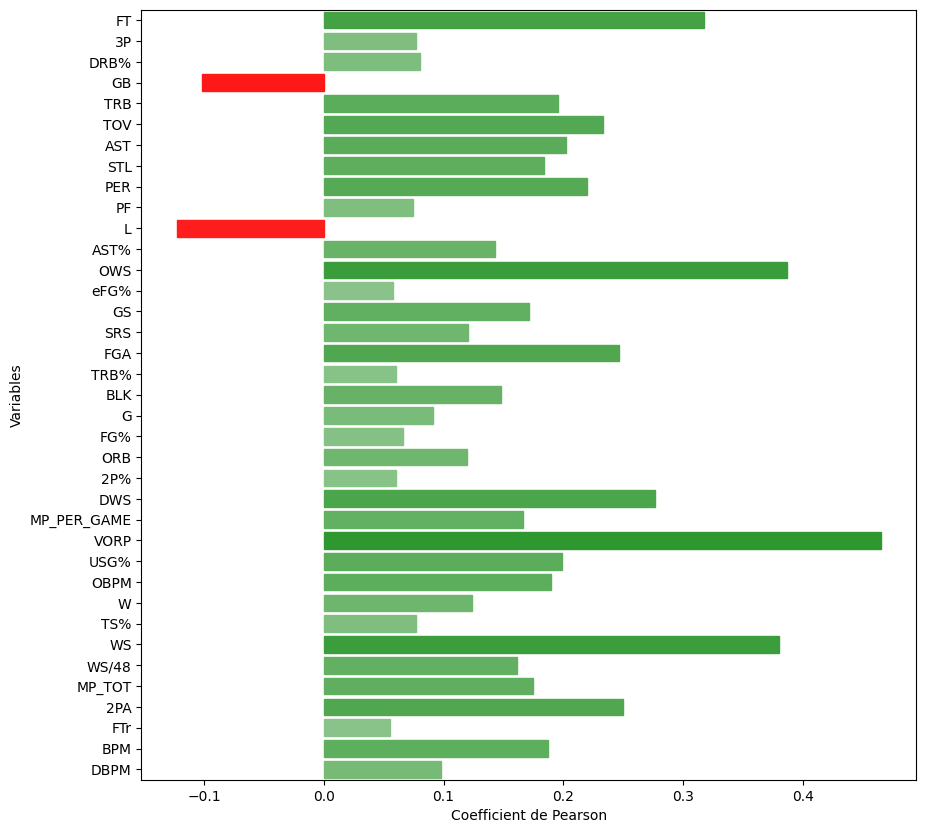

In [ ]:

# Création de la colormap personnalisée pour les valeurs négatives
colors = sns.light_palette("red", as_cmap=False, reverse=True, n_colors=10)
colors = mpl.colors.LinearSegmentedColormap.from_list("", colors, gamma=0.3)
cmap_neg = colors




# Création de la colormap personnalisée pour les valeurs positives
colors = sns.light_palette("green", as_cmap=False, reverse=False, n_colors=10)
colors = mpl.colors.LinearSegmentedColormap.from_list("", colors, gamma=0.3)
cmap_pos = colors

# Création du graphique avec les colormaps personnalisées
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=value_corr, y=selected_features4)

# Parcours de toutes les barres du graphique
for i, rect in enumerate(ax.patches):
    # Définition de la couleur de la barre en fonction de la valeur de corrélation
    if value_corr[i] < 0:
        rect.set_color(cmap_neg(-value_corr[i]))
    else:
        rect.set_color(cmap_pos(value_corr[i]))

plt.xlabel('Coefficient de Pearson')
plt.ylabel('Variables')
plt.show()


In [60]:
output4bis = prediction(DF,d,selected_features=selected_features4)
model_performance4= output4bis[2]
model_performance4.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),3.2,1.0,0.0,0.0,0.0
rf(2016),2.6,0.0,20.8,0.1,20.9
svm(2016),2.8,0.0,0.5,0.0,0.5
reg(2017),5.5,0.0,0.0,0.0,0.0
rf(2017),3.8,3.0,20.8,0.1,20.9
svm(2017),2.0,0.0,0.5,0.0,0.5
reg(2018),6.4,1.0,0.0,0.0,0.0
rf(2018),5.3,0.0,20.8,0.1,20.9
svm(2018),4.3,0.0,0.5,0.0,0.5
reg(2019),4.7,1.0,0.0,0.0,0.0


In [61]:
results(model_performance4)

,Reg,RF,SVM
MeanErrorRank,29.406338,24.007529,130.804262
Diff_Rank_MVP_actual/predict,3.000000,4.000000,2.000000
time to train,0.189939,104.203141,2.626415
time to predict,0.025899,0.283467,0.121018
total time,0.215838,104.486607,2.747433


On voit que les performances ne sont pas très bonnes comparés à ce que l'on avait précédemment

In [53]:
o = prediction(DF,d,cv="False",selected_features = [x for x in selected_features4 if x != "Share"],year = 2023)
o[2].sort_values(["Pred_Share_reg"],ascending=False).head(10).iloc[:, :-2]

Nombre de convoqués MVP : 0
Année TEST : 2023 ERROR RANK: nan



,Player,Pred_Share_reg,Rank_pred_reg,Pred_Share_rf,Rank_pred_rf,Pred_Share_svm,Rank_pred_svm
816,Nikola Jokić,0.211939,1,0.572582,1,0.191300,1
17944,Joel Embiid,0.179503,2,0.505070,2,0.176778,2
376,Luka Dončić,0.156429,3,0.277480,4,0.163470,3
284,Giannis Antetokounmpo,0.148641,4,0.329074,3,0.155750,4
1431,Shai Gilgeous-Alexander,0.140595,5,0.167060,7,0.120100,7
3235,Jayson Tatum,0.129628,6,0.182458,6,0.154536,5
4973,Domantas Sabonis,0.121712,7,0.134944,8,0.134947,6
9519,Damian Lillard,0.114433,8,0.098968,9,0.098419,16
12577,Jimmy Butler,0.112326,9,0.186520,5,0.111469,8
7926,Stephen Curry,0.112003,10,0.079372,10,0.102035,13


### Prediction 2023

Au vu des tests précédents, les variables les plus intéressantes sont dans le selected_features3 pour le SVM et le RF.
REMARQUE : Ici on ne prend en considération que les performances pour la prédiction du MVP et non pas la suite du classement c'est pourquoi le classement ( surtout vers la fin ) peut sembler mauvais

In [68]:
d_rf_svm= {"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500),"svm" : SVR(C = 10, gamma= 'scale', kernel= 'rbf')}
pred1 = prediction(DF,d_rf_svm,cv="False",selected_features = selected_features3,year = 2023)
pred1[2].sort_values(["Pred_Share_svm"],ascending=False).head(10).iloc[:, :-2]

,Player,Pred_Share_rf,Rank_pred_rf,Pred_Share_svm,Rank_pred_svm
816,Nikola Jokić,0.648072,1,0.874138,1
17944,Joel Embiid,0.578134,2,0.552479,2
376,Luka Dončić,0.435382,3,0.331357,3
284,Giannis Antetokounmpo,0.319676,4,0.324707,4
4973,Domantas Sabonis,0.086914,11,0.167632,5
3235,Jayson Tatum,0.173028,6,0.144204,6
16507,Donovan Mitchell,0.106048,9,0.136867,7
4474,Stanley Umude,0.000000,131,0.116803,8
4972,Deonte Burton,0.000000,131,0.099866,9
5904,Alondes Williams,0.000014,101,0.099707,10


Voyons par curiosité le classement avec toutes les variables

In [69]:
d_rf_svm= {"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500),"svm" : SVR(C = 10, gamma= 'scale', kernel= 'rbf')}
pred2 = prediction(DF,d_rf_svm,cv="False",year = 2023)
pred2[2].sort_values(["Pred_Share_svm"],ascending=False).head(10).iloc[:, :-2]

,Player,Pred_Share_rf,Rank_pred_rf,Pred_Share_svm,Rank_pred_svm
816,Nikola Jokić,0.604144,1,0.170291,1
17944,Joel Embiid,0.483572,2,0.165783,2
284,Giannis Antetokounmpo,0.380602,3,0.161179,3
3235,Jayson Tatum,0.205600,5,0.147770,4
376,Luka Dončić,0.273938,4,0.143730,5
15260,Ja Morant,0.058932,14,0.111592,6
4973,Domantas Sabonis,0.087462,11,0.109186,7
1431,Shai Gilgeous-Alexander,0.175568,6,0.106919,8
9990,Anthony Davis,0.095010,10,0.106902,9
9998,LeBron James,0.035816,18,0.103555,10


## BONUS H2O

Pour exploiter les outils que l'on a vu en cours, on s'est proposé de tester le module H2o sur cette problématique pour voir quel genre de modèles il utilise et ses prédictions pour l'année 2023.

In [96]:
h2o.init()

HF = h2o.H2OFrame(DF)
train =  HF[HF["Year"]<2023]
test = HF[HF["Year"]==2023]
x = HF.columns
y = "Share"
x.remove(y)
aml_2023 = H2OAutoML(max_models=20, seed=1,max_runtime_secs = 500)
aml_2023.train(x=x, y=y, training_frame=train)
lb = aml_2023.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
  Starting server from H:\Desktop\ING3\PFE NBA MVP PREDICTION\PFE\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\CYTECH~1\AppData\Local\Temp\tmp7g2iiw93
  JVM stdout: C:\Users\CYTECH~1\AppData\Local\Temp\tmp7g2iiw93\h2o_CYTech_Student_started_from_python.out
  JVM stderr: C:\Users\CYTECH~1\AppData\Local\Temp\tmp7g2iiw93\h2o_CYTech_Student_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_CYTech_Student_cjih7t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.698 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
22:07:25.392: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20230415_220725_model_2,0.0305836,0.000935358,0.00409969,0.0231391,0.000935358
GBM_grid_1_AutoML_1_20230415_220725_model_1,0.0305947,0.000936035,0.00449354,0.0231034,0.000936035
GBM_3_AutoML_1_20230415_220725,0.0308278,0.000950354,0.00412986,0.0232902,0.000950354
GBM_5_AutoML_1_20230415_220725,0.0309532,0.000958103,0.00404768,0.0236093,0.000958103
GBM_4_AutoML_1_20230415_220725,0.0310422,0.00096362,0.00414133,0.0235187,0.00096362
GBM_grid_1_AutoML_1_20230415_220725_model_3,0.0311934,0.000973026,0.0045094,0.023557,0.000973026
XRT_1_AutoML_1_20230415_220725,0.0313019,0.000979806,0.00417805,0.023495,0.000979806
DRF_1_AutoML_1_20230415_220725,0.0313673,0.00098391,0.00415604,0.0235218,0.00098391
GBM_2_AutoML_1_20230415_220725,0.0316038,0.000998802,0.00424595,0.0239535,0.000998802
GBM_grid_1_AutoML_1_20230415_220725_model_4,0.032149,0.00103356,0.00503366,0.0244226,0.00103356


In [125]:
preds_2023 = aml_2023.predict(test)
test["Pred_Share_aml"] = preds_2023
DF_PRED_H2O_2023 = pred_to_df([test["Pred_Share_aml"].as_data_frame()],test.as_data_frame(),"Share",{"aml":aml_2023})

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [138]:
DF_PRED_H2O_2023.sort_values(["Pred_Share_aml"],ascending=False).head(10).iloc[:, :-2]

,Player,Pred_Share_aml,Rank_pred_aml
520,Joel Embiid,0.619654,1
67,Nikola Jokić,0.587607,2
3,Giannis Antetokounmpo,0.445929,3
31,Luka Dončić,0.350299,4
130,Jayson Tatum,0.273319,5
105,Shai Gilgeous-Alexander,0.181693,6
462,Donovan Mitchell,0.118500,7
185,Domantas Sabonis,0.090428,8
379,Jimmy Butler,0.086426,9
129,Jaylen Brown,0.080701,10


On peut s'accorder à dire d'après les résultats des modèles que le MVP se jouera entre Jokic et Embiid. 
C'est d'ailleurs ce qui semble être attendu par la communauté suivant la NBA selon les différentes discussions que l'on peut lire sur les réseaux sociaux notamment Twitter. Une tendance semble en cette fin de saison pencher sur Embiid, un des facteurs de cette tendance serait que Jokic vient de gagner 2 MVPS et que les journalistes préfèrent en élire un nouveau.